In [1]:
#Modelo de testes no CCMFUT


#Autor: João A. Masiero
#Atualizado em 26/12/22

In [2]:
#Imports - Bibliotecas e pacotes
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
#Estilos gráficos
plt.style.use("ggplot") #plot style
#https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html 


In [4]:
#Import database - .xlsx ou .csv - em um dataframe
ticker = "CCMFUT" #Nome do Ticker
df = pd.read_excel('CCM_Historico.xlsx')
#Formatações
df = df.iloc[::-1] #inverte a ordem (último dia no final)
df = df.set_index("Data") #coloca a coluna 'Data' como indexador

In [7]:
#Criando a média nova
p1 = 8

ma1 = pd.DataFrame()
ma1.index = df.index
ma1["Media_Movel"] = df["Fechamento"].rolling(window = p1).mean()

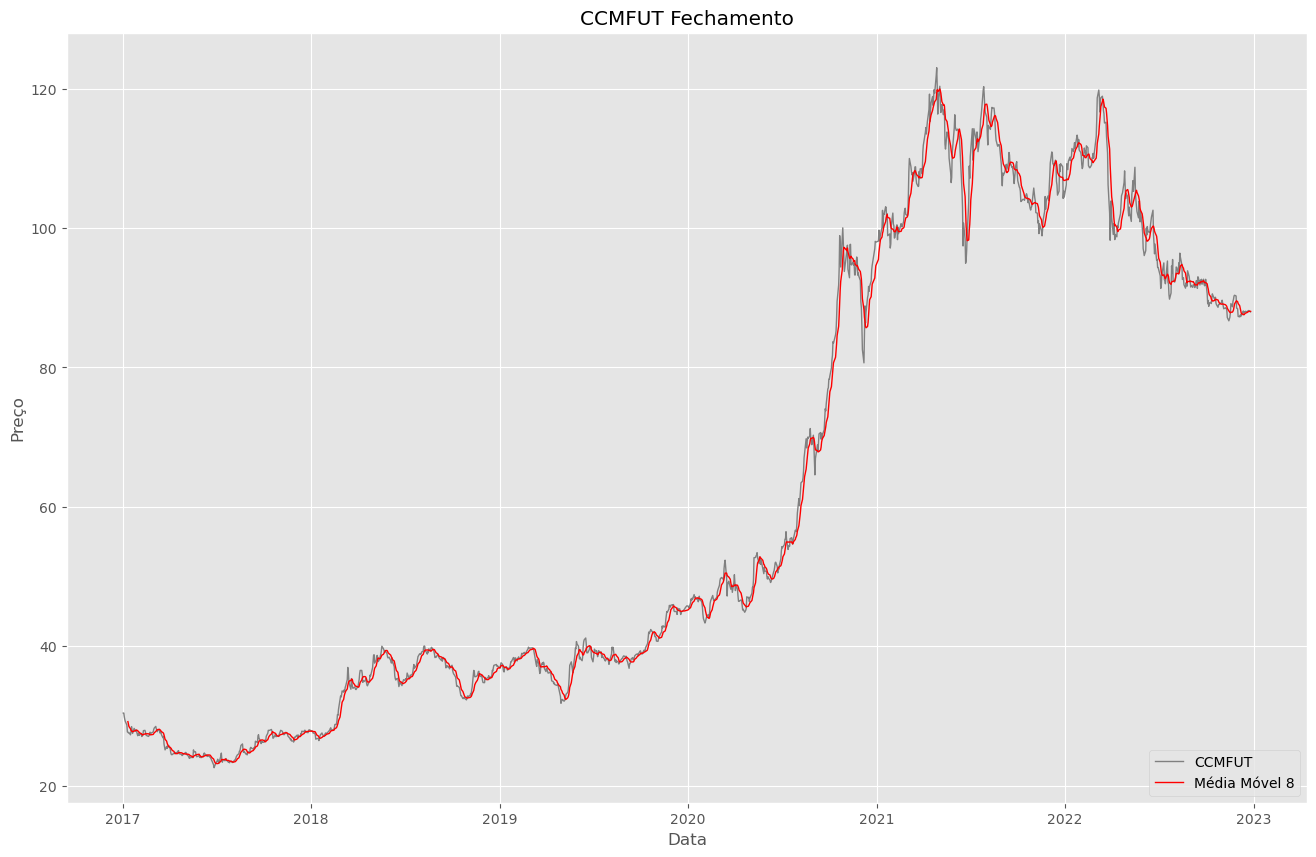

In [8]:
#Visualização todos os dados
plt.figure(figsize=(16, 10))
plt.plot(df.index,df["Fechamento"], label = ticker, linewidth = 1, color = "grey")
plt.plot(ma1.index,ma1["Media_Movel"], label = "Média Móvel {}".format(p1), linewidth = 1, color = "red")
plt.title(ticker+" Fechamento")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.legend(loc = "lower right")
plt.show()


In [9]:
#Criando um dataframe onde está contida a regra
df_regra = pd.DataFrame()
df_regra.index = df.index
df_regra["Fechamento"] = df["Fechamento"]
df_regra["Media_Movel"] = ma1["Media_Movel"]
df_regra

,Fechamento,Media_Movel
Data,,
2017-01-02,30.41,NaN
2017-01-03,30.41,NaN
2017-01-04,29.87,NaN
2017-01-05,29.47,NaN
2017-01-06,29.21,NaN
...,...,...
2022-12-20,88.00,87.91000
2022-12-21,88.10,87.98500
2022-12-22,88.15,87.99250


In [10]:
# Cria a regra de sinal
def regra(df_regra):
    preco_compra = []
    preco_venda = []
    aux = 1 #auxilia na lógica de programação que terá na sequência:
    
    for i in range(len(df_regra)):                                            #para cada linha que eu tiver na base:
        if df_regra["Fechamento"][i] > df_regra["Media_Movel"][i]:                  #Se  Close > MM 
            if aux != 1:                                                      #aux != 1? não porque começa em 1 (pula pro else) - ignora o início
                preco_compra.append(df_regra["Fechamento"][i])                           #adiciona preço de compra ao df
                preco_venda.append(np.nan)                                      #preenche NAN(not a number)
                aux = 1                                                         #vira aux para 1
            else:                                                             #se aux = 1:
                preco_compra.append(np.nan)                                     #preenche NAN(not a number)
                preco_venda.append(np.nan)                                      #preenche NAN(not a number)
        elif df_regra["Fechamento"][i] < df_regra["Media_Movel"][i]:              #Se não Se, Close < MM 
            if aux != 0:                                                      #e aux!=0
                preco_compra.append(np.nan)                                     #NaN
                preco_venda.append(df_regra["Fechamento"][i])                            #adiciona preço de venda no df
                aux = 0                                                         #vira aux para 0
            else:                                                             #se aux = 0
                preco_compra.append(np.nan)                                     #preenche NAN(not a number)
                preco_venda.append(np.nan)                                      #preenche NAN(not a number)
        else:                                                               #se não:             
            preco_compra.append(np.nan)                                       #preenche NAN(not a number)
            preco_venda.append(np.nan)                                        #preenche NAN(not a number)
        
    return(preco_compra, preco_venda)                                     #RETORNO da função

In [11]:
#Armazena os valores - Cria o sinal
compra, venda = regra(df_regra) #cria as variaveis de acordo com a função
sinal = pd.DataFrame()          #cria dataframe chamado "sinal"
sinal["Compra"] = compra        #adiciona coluna compra no df sinal
sinal["Venda"] = venda          #adiciona coluna venda no df sinal
df_regra["Compra"] = compra     #adiciona ao df_regra, info de quando ocorreu a compra
df_regra["Venda"] = venda       #adiciona ao df_regra, info de quando ocorreu a venda
df_regra

,Fechamento,Media_Movel,Compra,Venda
Data,,,,
2017-01-02,30.41,NaN,NaN,NaN
2017-01-03,30.41,NaN,NaN,NaN
2017-01-04,29.87,NaN,NaN,NaN
2017-01-05,29.47,NaN,NaN,NaN
2017-01-06,29.21,NaN,NaN,NaN
...,...,...,...,...
2022-12-20,88.00,87.91000,NaN,NaN
2022-12-21,88.10,87.98500,NaN,NaN
2022-12-22,88.15,87.99250,NaN,NaN


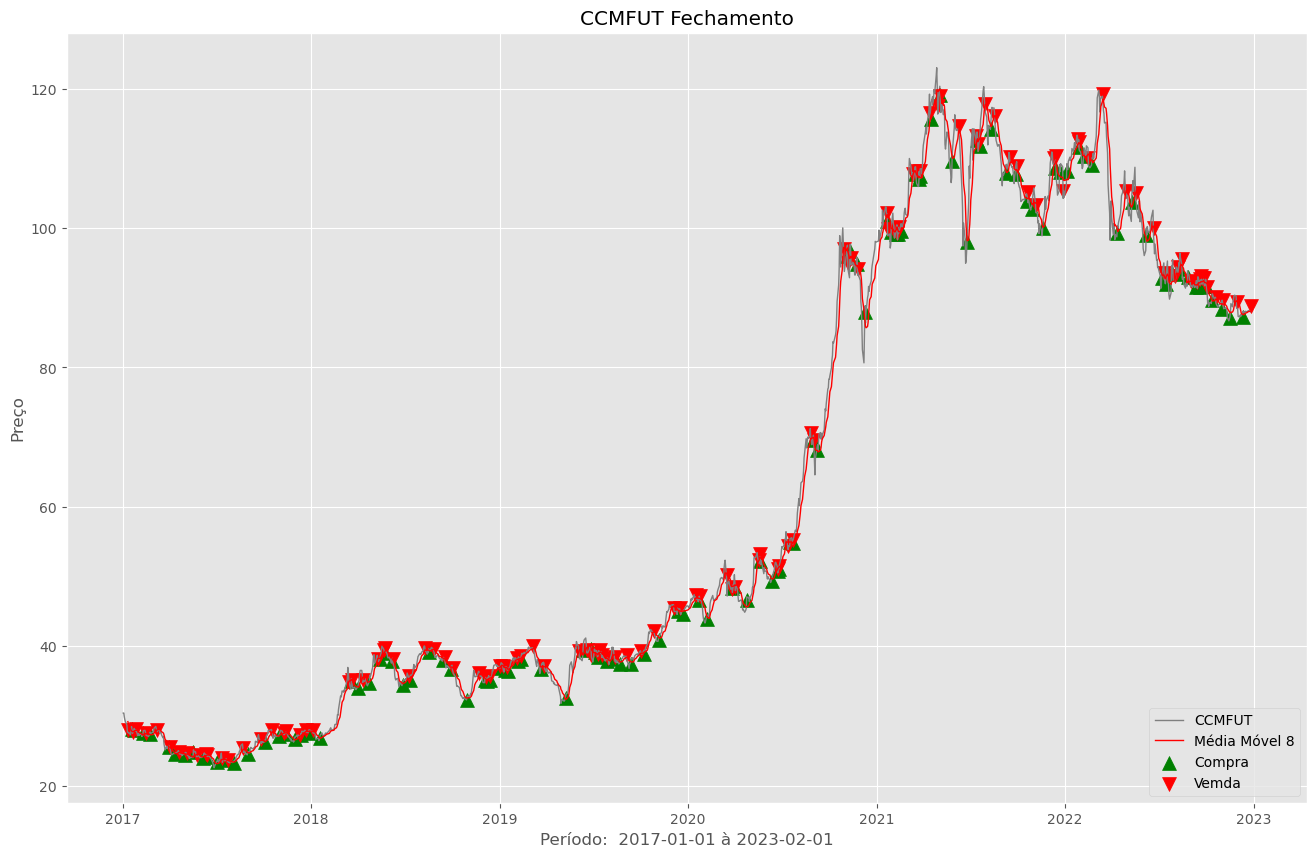

In [12]:
#Coloca os sinais no gráfico para visualização
plt.figure(figsize=(16, 10))
plt.plot(df_regra.index,df_regra["Fechamento"], label = ticker, linewidth = 1, color = "grey")
plt.plot(df_regra.index,df_regra["Media_Movel"], label = "Média Móvel {}".format(p1), linewidth = 1, color = "red")
#Scatter - Indicadores de onde comprou ou vendeu
plt.scatter(df_regra.index, df_regra["Compra"]*0.99, label="Compra", marker="^", s=100, color="green")
plt.scatter(df_regra.index, df_regra["Venda"]*1.01, label="Vemda", marker= "v", s=100, color="red")
plt.title(ticker+" Fechamento")
plt.xlabel("Período:  {}".format(periodo_analise))
plt.ylabel("Preço")
plt.legend(loc = "lower right")
plt.show()


In [13]:
#Retorna apenas as linhas onde houve compras
df_compra = df_regra[ ~ df_regra["Compra"].isna()] 

In [14]:
#Retorna apenas as linhas onde houve vendas
df_venda = df_regra[ ~ df_regra["Venda"].isna()]

In [15]:
#Compara se o número de compras e vendas são iguais
#Caso contrário, exclui-se oque estiver em aberto
df_c_num = df_compra.shape[0] #variável num de compras
df_v_num = df_venda.shape[0] #variavel num de vendas
print("Total de compras: "+str(df_c_num))
print("Total de Vendas: "+str(df_v_num))
#Função para retirar a última operação
def elimina_ultimo_c(df_c_num, df_v_num):
    if df_c_num > df_v_num:
        return np.array(df_compra["Compra"])[:-1]
    elif df_v_num == df_c_num:
        return np.array(df_compra["Compra"])
    else:
        return np.array(df_compra["Compra"])
    
def elimina_ultimo_v(df_c_num, df_v_num):
    if df_v_num > df_c_num:
        return np.array(df_venda["Venda"])[:-1]
    elif df_c_num == df_v_num:
        return np.array(df_venda["Venda"])
    else:
        return np.array(df_venda["Venda"])
   
        

Total de compras: 118
Total de Vendas: 119


In [16]:
#transforma o df_compra/venda em um array
elimina_ultimo_c(df_c_num, df_v_num)

array([ 28.47,  28.21,  27.89,  27.67,  25.77,  24.73,  24.68,  25.13,
        24.19,  24.4 ,  23.56,  23.88,  23.51,  24.82,  26.53,  27.34,
        27.66,  26.95,  27.48,  27.89,  27.11,  35.36,  34.31,  35.09,
        38.61,  39.36,  38.32,  34.82,  35.45,  39.62,  38.39,  37.05,
        32.64,  35.53,  35.38,  35.51,  37.3 ,  36.98,  36.77,  38.22,
        38.61,  37.16,  32.86,  39.88,  39.94,  39.58,  38.85,  39.17,
        38.31,  38.59,  37.81,  37.88,  39.31,  41.28,  45.47,  45.1 ,
        47.17,  44.41,  48.79,  49.12,  47.09,  52.82,  49.83,  51.28,
        51.56,  55.44,  55.33,  70.27,  68.88,  96.95,  97.61,  95.84,
        88.82, 102.02, 100.38, 100.2 , 100.11, 100.62, 108.76, 108.11,
       108.48, 116.8 , 120.33, 110.7 ,  98.94, 113.78, 112.85, 115.31,
       109.01, 108.87, 104.91, 103.73, 101.06, 109.73, 109.1 , 109.21,
       112.69, 111.47, 110.07, 100.28, 104.82,  99.96,  93.69,  92.93,
        94.55,  94.4 ,  95.  ,  93.86,  92.46,  93.  ,  92.52,  92.64,
      

In [17]:
elimina_ultimo_v(df_c_num, df_v_num)

array([ 27.69,  27.49,  27.81,  27.25,  27.74,  25.27,  24.59,  24.47,
        24.15,  24.3 ,  24.18,  23.69,  23.43,  25.13,  26.4 ,  27.68,
        27.31,  27.59,  27.03,  27.66,  27.74,  34.59,  34.82,  34.82,
        37.8 ,  39.09,  39.32,  37.73,  35.33,  39.35,  39.25,  38.11,
        36.56,  35.76,  35.27,  35.33,  36.83,  36.73,  36.59,  37.88,
        38.23,  39.63,  36.78,  38.86,  39.06,  38.4 ,  38.5 ,  39.11,
        38.38,  37.87,  38.14,  38.32,  38.91,  41.8 ,  45.08,  45.05,
        46.81,  46.68,  49.69,  47.73,  47.98,  51.85,  52.77,  50.52,
        51.04,  53.88,  54.64,  69.82,  68.89,  96.05,  94.1 ,  94.76,
        93.23, 101.2 ,  98.89,  98.55,  98.32,  99.19, 106.7 , 107.04,
       107.08, 115.3 , 116.34, 117.77, 113.49, 112.08, 110.95, 116.6 ,
       114.9 , 109.07, 107.79, 104.12, 102.21, 108.91, 109.23, 104.24,
       111.68, 111.18, 108.93, 118.11, 104.2 , 103.91,  98.96,  92.56,
        92.21,  92.23,  93.46,  94.67,  91.53,  91.34,  91.82,  92.12,
      

In [18]:
#Cálculos dos resultados:
interval_dias = (df.loc[inicio:fim])
interval_dias_contagem = len(interval_dias)
interval_meses = interval_dias_contagem/20
interval_anos = interval_meses/12
retorno = sum(elimina_ultimo_v(df_c_num, df_v_num)-elimina_ultimo_c(df_c_num, df_v_num))
ret_por_contrato = retorno*450
ret_por_mes = ret_por_contrato/interval_meses

In [19]:
#Resultados - Resumo preliminar - Precisa rever isso aqui
#passar tudo em percentuais e pontos pra relativizar
print("\nIntervalo Selecionado: {} dias, {:.2f} meses, {:.2f} anos.\n".format(interval_dias_contagem, interval_meses, interval_anos))
print("Resultado por saca: {:.2f} (pts) ".format(retorno))
print("Resultado por contrato: R$ {:.2f}".format(ret_por_contrato))
print("Resultado por contrato por mês: R$ {:.2f}".format(ret_por_mes))


Intervalo Selecionado: 1482 dias, 74.10 meses, 6.17 anos.

Resultado por saca: 30.02 (pts) 
Resultado por contrato: R$ 13509.00
Resultado por contrato por mês: R$ 182.31
